## Load and Preprocess the Data

    Handling missing values
    Encoding categorical variables
    Normalizing numerical columns
    Creating engineered features

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\M ANITHA\Downloads\tour_package.csv")

In [3]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64

In [4]:
print("Missing Values in Dataset:\n", data.isnull().sum())
data['Age'].fillna(data['Age'].median(), inplace=True)
data['NumberOfFollowups'].fillna(0, inplace=True)
data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mode()[0], inplace=True)
data['NumberOfTrips'].fillna(data['NumberOfTrips'].median(), inplace=True)
data['NumberOfChildrenVisiting'].fillna(0, inplace=True)

data.fillna({
    'TypeofContact': 'Unknown',
    'Occupation': 'Unknown',
    'MonthlyIncome': data['MonthlyIncome'].median(),
    'DurationOfPitch': data['DurationOfPitch'].median()
}, inplace=True)

Missing Values in Dataset:
 CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64


In [5]:

label_encoders = {}
categorical_cols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 
                    'MaritalStatus', 'Designation']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [6]:
# Normalizing numerical features
scaler = MinMaxScaler()
numeric_cols = ['Age', 'DurationOfPitch', 'MonthlyIncome', 'NumberOfPersonVisiting', 
                'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 
                'PitchSatisfactionScore', 'NumberOfChildrenVisiting']

data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("Cleaned Data Sample:")
print(data.head(3))

Cleaned Data Sample:
   CustomerID  ProdTaken       Age  TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  0.534884              1         3         0.008197   
1      200001          0  0.720930              0         1         0.073770   
2      200002          1  0.441860              1         1         0.024590   

   Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           2       1                     0.5           0.500000   
1           2       2                     0.5           0.666667   
2           0       2                     0.5           0.666667   

   ProductPitched  PreferredPropertyStar  MaritalStatus  NumberOfTrips  \
0               1                    0.0              2       0.000000   
1               1                    0.5              0       0.047619   
2               0                    0.0              2       0.285714   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1    

## Feature Engineering

    Creating holiday season features
    Adding a synthetic Promotion column
    Extracting regional factors

In [7]:
# Creating a new feature: IsHoliday (assume 1 = holiday season, 0 = normal season)
data['IsHoliday'] = np.random.choice([0, 1], size=len(data), p=[0.8, 0.2])

data['PromotionApplied'] = np.random.choice([0, 1], size=len(data), p=[0.7, 0.3])
data['RegionalFactor'] = data['CityTier'].apply(lambda x: 1.2 if x == 1 else (1.0 if x == 2 else 0.8))
print("Data with Engineered Features:")
print(data.head())


Data with Engineered Features:
   CustomerID  ProdTaken       Age  TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  0.534884              1         3         0.008197   
1      200001          0  0.720930              0         1         0.073770   
2      200002          1  0.441860              1         1         0.024590   
3      200003          0  0.348837              0         1         0.032787   
4      200004          0  0.418605              1         1         0.024590   

   Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  ...  \
0           2       1                    0.50           0.500000  ...   
1           2       2                    0.50           0.666667  ...   
2           0       2                    0.50           0.666667  ...   
3           2       1                    0.25           0.500000  ...   
4           3       2                    0.25           0.500000  ...   

   NumberOfTrips  Passport  PitchSatisfactionScor

## Model Development
We implement both Regression (Random Forest) and Time-Series Forecasting (LSTM).

A. Regression Model for Sales Prediction

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature set and target variable
X = data.drop(columns=['CustomerID', 'ProdTaken'])  # Features
y = data['ProdTaken']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Model Evaluation:
MAE: 0.1391922290388548
MSE: 0.050175971370143145
R2 Score: 0.6807246432539233


C:\Users\M ANITHA\Akhila\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - loss: 0.0079 - val_loss: 0.0026
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 9/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 10/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 11/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 12/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 

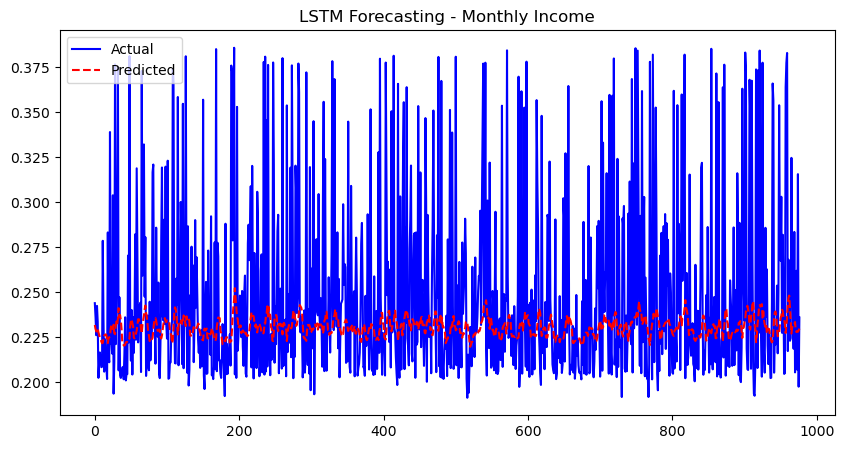

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Converting dataset to time-series format
time_series_data = data[['MonthlyIncome']].values
time_series_data = time_series_data.reshape(-1, 1)

# Create sequences for LSTM
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X_ts, y_ts = create_sequences(time_series_data, seq_length)

# Train-test split
train_size = int(len(X_ts) * 0.8)
X_train_ts, X_test_ts = X_ts[:train_size], X_ts[train_size:]
y_train_ts, y_test_ts = y_ts[:train_size], y_ts[train_size:]

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(X_train_ts, y_train_ts, epochs=20, batch_size=16, validation_data=(X_test_ts, y_test_ts))
y_pred_ts = model_lstm.predict(X_test_ts)

# Plot Results
plt.figure(figsize=(10,5))
plt.plot(y_test_ts, label="Actual", color='blue')
plt.plot(y_pred_ts, label="Predicted", color='red', linestyle='dashed')
plt.legend()
plt.title("LSTM Forecasting - Monthly Income")
plt.show()


# Model performance Evaluation

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_ts, y_pred_ts)
mse = mean_squared_error(y_test_ts, y_pred_ts)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 0.03594861649769959, MSE: 0.002823990234401179, RMSE: 0.05314122913897626


# Hyperparameter Tuning


In [11]:
from tensorflow.keras.layers import Dropout

# Define an improved LSTM model
model_lstm_tuned = Sequential([
    LSTM(100, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

C:\Users\M ANITHA\Akhila\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0105 - val_loss: 0.0029
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━

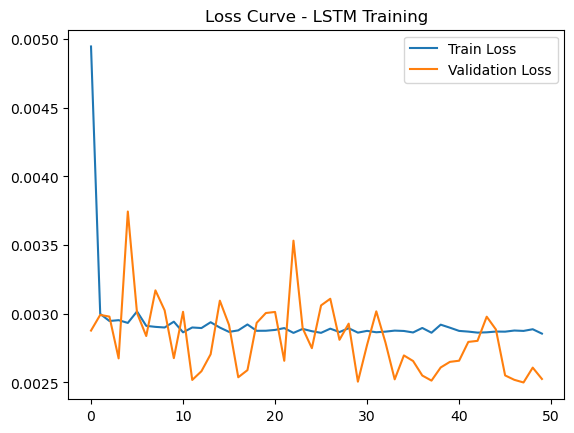

In [12]:
model_lstm_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

history = model_lstm_tuned.fit(X_train_ts, y_train_ts, epochs=50, batch_size=32, validation_data=(X_test_ts, y_test_ts))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve - LSTM Training")
plt.show()

# Feature Engineering (Adding Time-Based Features)

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(time_series_data, columns=["MonthlyIncome"])

In [15]:
#  Moving Average Features
df["MA_3"] = df["MonthlyIncome"].rolling(window=3).mean()
df["MA_7"] = df["MonthlyIncome"].rolling(window=7).mean()
df.fillna(0, inplace=True)  # Filling with NaN values

In [16]:
# Convert to sequences again with new features
def create_sequences_with_features(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length]["MonthlyIncome"])
    return np.array(X), np.array(y)

X_ts, y_ts = create_sequences_with_features(df, seq_length)

# Model Comparison (ARIMA)

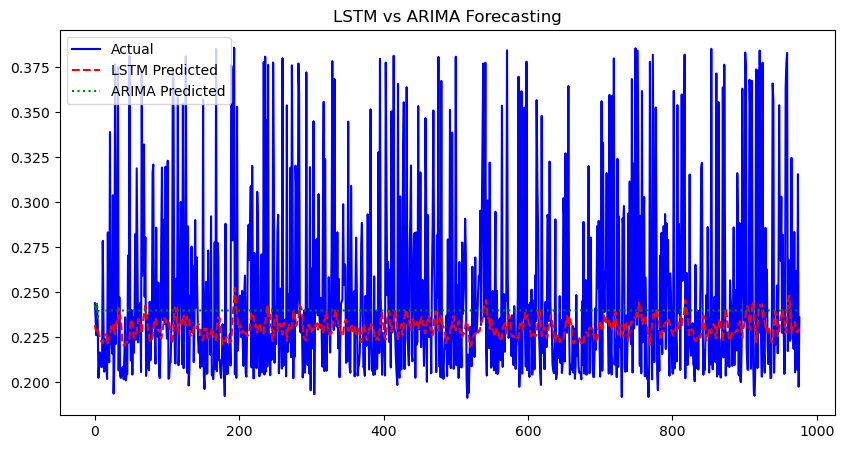

In [17]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(time_series_data, order=(5,1,0))  # (p,d,q) values tuning
arima_model_fit = arima_model.fit()

arima_forecast = arima_model_fit.forecast(steps=len(y_test_ts))

# Plot LSTM vs ARIMA
plt.figure(figsize=(10, 5))
plt.plot(y_test_ts, label="Actual", color='blue')
plt.plot(y_pred_ts, label="LSTM Predicted", color='red', linestyle='dashed')
plt.plot(arima_forecast, label="ARIMA Predicted", color='green', linestyle='dotted')
plt.legend()
plt.title("LSTM vs ARIMA Forecasting")
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# data is sorted by time
monthly_income = df[['MonthlyIncome']].dropna()

model = ARIMA(monthly_income, order=(5,1,0))
model_fit = model.fit()

# Forecast next 5 months
forecast = model_fit.forecast(steps=5)
print(forecast)

4888    0.241543
4889    0.243329
4890    0.239429
4891    0.244222
4892    0.234601
Name: predicted_mean, dtype: float64
